In [2]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
from scipy.special import binom
import pylab as p
import math

**Problem:** in our class there are 77 students. Would you bet that there are at lest two students with the same birthday (day and month)? (assume you were all born in a non leap year)

**Solution:** assume each student has equal chances to be born in any day of the year. Thus, there are $D=365^{77}$ possibilities. However, there are only $N=365\cdot 364\cdots (365-77+1)$ assignments of unique birthdays to the 77 students. Thus the probability that the students were all born in different days is $N/D$. Taking the complement event we obtain $1-N/D$.


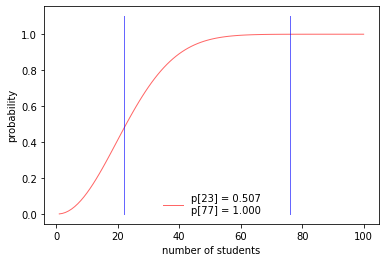

In [3]:
# number of days of the year (not a leap year)
N = 365

# array of number of students (from 1 to max=N)
nn = range(1,N+1)

# birthday probability vector
p = []

# number of pairs to plot
m = 100

for n in nn:
    
    # compute p = 1 - N/D for n students
    num = range(n)
    num = np.array([float(N-x) for x in num])
    denom = np.array([float(N)]*n)
    q = num/denom
    p.append(1-np.prod(q))

p = np.array(p)

# find p^-1(0.5)
i = np.nonzero((p > 0.48) & (p < 0.52))
k05 = i[0][0]
k = 76

y = np.linspace(0.0, 1.1, 100)
x1 = [k]*100
x2 = [k05]*100

# plot probability as a function of the number of the students
fig, ax = plt.subplots(1, 1)
label = "p[{}] = {:0.3f}\np[{}] = {:0.3f}".format(k05+1,p[k05],k+1,p[k])
ax.plot(nn[:m], p[:m], 'r-', lw=1, alpha=0.6, label=label)
ax.plot(x1,y, 'b-', lw=1, alpha=0.6)
ax.plot(x2,y, 'b-', lw=1, alpha=0.6)
ax.legend(loc='best', frameon=False)
plt.xlabel("number of students")
plt.ylabel("probability")
plt.show()


**Probability Spaces**

Consider the following probability space

${\cal P}=([0,1],{\cal B},\lambda)$ where

1. ${\cal B}$ is the smallest $\sigma$-field that contains the intervals in $[0,1]$ (Borel $\sigma$-algebra)

2. $\lambda:{\cal B}\rightarrow [0,1]$ is the only probability measure such that
$P([a,b))=b-a$ (Lebesgue mesaure on ${\cal B}$)

This is the one-dimensional version of the experiment of shooting darts on a square of side one explained in the recorded lecture. Think of shooting darts using a collimator that ensures that the dart will always hit on the segment of length 1.

**Problem:** Let  𝐴=[0,1/2]⊆[0,1] . What is  𝜆(𝐴) ?

**Solution:**  𝜆(𝐴)=1/2−0=1/2 


In [ ]:
def P(I):
    return I[1]-I[0]

A=[0,1/4]

P(A)



**Problem:** Let us translate the interval by 1/4:  𝐵=[1/4,3/4] . What is  𝜆(𝐵) ?

**Solution:**  𝜆(𝐵)=3/4−1/4=1/2 . Since the probability of an interval depends only on its length the probability of any interval is invariant under translation as long as the translated interval remains contained in  [0,1]

In [ ]:
def P(I):
    return I[1]-I[0]

A=[0,1/4]

B = [x+1/4 for x in A]

P(B)


**Indicator Random Variables**

${\cal P}=([0,1],{\cal B},\lambda)$

Let $A=[0,1/2]$ and

$X_A:[0,1]\rightarrow \{0,1\}$ the RV defined as

$X(\omega)=1$ if and only if $\omega\in A$

**Problem**: what is $P(X_A=1)$?

**Solution**: $P(X_A=1)=P(\{\omega: X_A(\omega)=1\})=P(A)=1/2$

**Problem**: Let $B=[0,p]$, $p\leq 1$, what is $P(X_B=1)$?

**Solution**: $P(X_B=1)=P(\{\omega: X_B(\omega)=1\})=P(B)=p$

In [ ]:
def P(I):
    return I[1]-I[0]

p = 0.2

I = [0,p]

P(I)


**Problem:** simulate the flipping of a coin with probability of Head equal to $p$ using a random number generator that samples uniformly at random a number in $[0,1]$

**Solution:** This is equivalent to sampling an indicator RV for event $A=[0,p)$ of probability space ${\cal P}$. Thus, sample a number from $[0,1]$ and return 1 if the number is smaller than or equal to $p$

In [15]:
p = 0.7
I = [0.1,p+0.1]

print(I[1]-I[0])

# throw a dart 10000 times on a segment of length 1
r = np.random.random(10000)

# apply original indicator RV:
x1 = r<=p
x1 = [int(u) for u in x1]

# apply new indicator RV:
x2 = (r<=I[1]) & (r>=I[0])
x2 = [int(u) for u in x2]

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

0.7
0.705
0.711


In [ ]:
n = 1000
p = 0.7

r = np.random.random(n)<p

r = [int(x) for x in r]

sum(r)/len(r)

**Independent Events**

Consider the probability space for casting two perfect dice

${\cal D}=(\Omega=\{1,2,3,4,5,6\}\times \{1,2,3,4,5,6\},2^{\Omega},P)$

where $P$ is the unique extension to $2^{\Omega}$ of that function that assigns 1/36 to each singleton $\{(i,j)\}$ for $i,j\in \{1,2,3,4,5,6\}$

Thus, for any $A\in \Omega$ it is $P(A)=|A|/|\Omega|$

**Problem:** show that the probability of having seeing pair 2,4 factors as the product of seeing 2 in the first die and 4 in the second

**Solution:** define the events, evaluate the three probabilities, and verify the factoring property

In [ ]:
faces = range(6)
faces = [x+1 for x in faces]

omega = [(x,y) for x in faces for y in faces]

omega



In [ ]:
# define event A = "2 observed on the first die"
A = [(2,x) for x in faces]

# define event B = "4 observed in the second die"
B = [(x,4) for x in faces]

# compute intersection of the two events
AB = [x for x in A if x in B]

# evaluate probabilities
pA = len(A)/len(omega)
pB = len(B)/len(omega)
pAB = len(AB)/len(omega)

# print results
print("{} * {} = {}".format(pA,pB,pA*pB))
print("pAB = {}".format(pAB))

**Binomial distributions**

Recall that variable $Y$ defined as "the number of successes in a sequence of $n$ independent trials each with success probability equal to $p$" is distributed according to a Binomial distribution with parameter $p$:

$P(Y=k)={n \choose k}p^k(1-p)^{n-k}$

**Problem:** Verify experimentaly that the distribution of $Y$ is essentially the distribution of the sum of $n$ independent Bernoulli RVs with parameter $p$

**Solution:** sample $m$ sequences of $n$ trials and build an histogram. Draw the probability distribution of $Y$ and observe that the histogram approximates it

In [ ]:
p = 0.6   # success probability
n = 10    # number of trials
m = 10000 # number of sequences of trials

# define value of P(Y=k) using the Binomial distribution
P = [float(binom(n,k))*p ** k*(1-p) ** (n-k) for k in range(n+1)]

# sample m sequences of n trials
X = np.random.random((m,n))<=p

# add trials row by row
sumX = np.sum(X,axis=1)

# draw curve (k,P(k)) and histogram of sumX values
fig, ax = plt.subplots(1, 1)
label = "Binomial(n={},p={})".format(n,p)
ax.plot(range(len(P)), P, 'r-', lw=1, alpha=0.6, label=label)
ax.hist(sumX, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.xlabel("number of successes in {} trials".format(n))
plt.ylabel("Probability")
plt.show()


**Normal densities**

Let $X\sim N(0,1)$

Thus, the probability density of $X$ is

$N(0,1)(x)=\frac{1}{\sqrt{2\pi}}e^{\frac{1}{2}x^2}$

Let $A\subseteq \mathbf{R}$ be a measurable event. Then

$
P(X\in A)=\int_A N(0,1)(u)du
$

The probability that $X$ falls in set $(\infty,x]$ is sometimes called cumulative distribution function (cdf) and is denoted as $\Phi(x)$. Thus

$\Phi(x)=P(X\in (\infty,x])=P(X\leq x)=\int_{-\infty}^x N(0,1)(u)du$

**Problem:** plot $N(0,1)(x)$ between the percentile 0.1 and the percentile 99.9

**Solution:** Build sequence $x$ of  100  equally spaced points on the x-axis in interval $[a,b]$ with $a=\Phi^{-1}(0.001)$ and $b=\Phi^{-1}(0.999)$ and then plot pairs $(x,N(0,1)(x))$

In [ ]:
f=norm
label = 'standard normal distribution'
x = np.linspace(f.ppf(0.001), f.ppf(0.999), 100)
x

Plot standard normal density function $N(0,1)(x)$ as per solution

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, f.pdf(x), 'r-', lw=1, alpha=0.6, label=label)

**Problem:** sample $n=1000$ points i.i.d., $x_i\sim N(0,1)$, $i=1,2,\ldots,n$, compute the histogram together with the density $N(0,1)(x)$

In [ ]:
n = 1000
r = f.rvs(size=n)
r

Compute histogram with the $n=1000$ sampled points and draw it along with $N(0,1)$

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, f.pdf(x), 'r-', lw=1, alpha=0.6, label=label)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

**Problem:** Show experimentally that if $X\sim N(0,1)$ then $\sigma X+\mu\sim N(\mu,\sigma^2)$

**Solution:** sample  $n=1000$  points i.i.d.,  $x_i\sim N(0,1)$ ,  $i=1,2,…,n$ , rescale and translate each point, and compute the histogram together with the density  $N(\mu,\sigma^2)(x)$

In [ ]:
mu = 5
sigma = 4
n = 1000
f = norm
r = f.rvs(size=n)    # sample n points from N(0,1)
r = sigma * r + mu

f = norm(loc=mu,scale=sigma)
label = "N({},{})".format(mu,sigma*sigma)

fig, ax = plt.subplots(1, 1)
x = np.linspace(f.ppf(0.001), f.ppf(0.999), 100)
ax.plot(x, f.pdf(x), 'r-', lw=1, alpha=0.6, label=label)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()



**Problem:** Verify that if $X_i\sim N(\mu,\sigma^2)$ then the distribution of the sample mean $\overline{X}_n=\frac{1}{n}\sum_{i=1}^n X_i$ is $N(\mu,\sigma^2/n)$

**Solution:** sample $m$ sequences of $n$ elements from $N(\mu,\sigma^2)$, compute $m$ sample means, compute the histogram and plot it along with $N(\mu,\sigma^2/n)$

Note that the distribution of the sample mean is much narrower. In fact how narrow it is depends on the size $n$ of each sequence

In [ ]:
def plot_curve_and_histo(f,r=[], label="",c='r-'):
    x = np.linspace(f.ppf(0.001), f.ppf(0.999), 100)
    ax.plot(x, f.pdf(x), c, lw=1, alpha=0.6, label=label)
    if len(r) > 0:
        ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    
mu = 5
sigma = 4

n = 10     # number of sample means
m = 1000   # number of points used in each sample mean

f = norm
r = f.rvs(size=(m,n))
r = sigma * r + mu
          
sample_means = np.mean(r,axis=1)

f = norm(loc=mu,scale=sigma/np.sqrt(n))
label = "means ~ N({},{})".format(mu,sigma*sigma/n)

fig, ax = plt.subplots(1, 1)

plot_curve_and_histo(f,sample_means,label)

label_original = "X ~ N({},{})".format(mu,sigma*sigma)
plot_curve_and_histo(norm(loc=mu,scale=sigma),[],label_original, 'b-')
plt.show()


**Problem:** draw $\Phi(x)=P(X\leq x)$ for $X\sim N(0,1)$

In [ ]:
def plot_curve_and_histo(f,r=[], label="",c='r-'):
    x = np.linspace(f.ppf(0.001), f.ppf(0.999), 100)
    ax.plot(x, f.cdf(x), c, lw=1, alpha=0.6, label=label)
    if len(r) > 0:
        ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    
f = norm()
fig, ax = plt.subplots(1, 1)
plot_curve_and_histo(f,[],"Phi")
plt.show()

**Universal Transformation of Probability**

Let $X$ be an arbitrary RV. Then $F_X(x)=P(X\leq x)$ is a monotone nondecreasing function (invertible). Since $X$ is a RV then $Y=F_X(X)$ is also a RV.

What is the distribution of $Y$?

$P(Y\leq y)=P(F_X(X)\leq y)=P(X\leq F_X^{-1}(y))=F_X(F_X^{-1}(y))=y$

This is the cdf of the uniform density on $[0,1]$ (we can find that through differentiation of $P(Y\leq y)$ with respect to $y$).

Thus, $Y\sim U[0,1]$: uniform on interval $[0,1]$

**Problem:** Sample from $N(0,1)$ using a random number generator that samples uniformly at random from interval $[0,1]$

**Solution:** Use the Universal transformation of probability: sample $X\sim U(0,1)$. Then return $\Phi^{-1}(x)$

In [ ]:
def plot_curve_and_histo(f,r=[], label="",c='r-'):
    x = np.linspace(f.ppf(0.001), f.ppf(0.999), 100)
    ax.plot(x, f.pdf(x), c, lw=1, alpha=0.6, label=label)
    if len(r) > 0:
        ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)

n = 1000
mu = 2
sigma = 5

# Sample n points x_1, x_2, \ldots, x_n unformly at random from [0,1]
x = np.random.random(n)

# Find inverse images wrt Phi
f = norm(loc=mu,scale=sigma)
y = f.ppf(x)

# plot gaussian N(mu,sigma^2) and histogram of y
fig, ax = plt.subplots(1, 1)
plot_curve_and_histo(f,y,"N({},{})".format(mu,sigma**2))
plt.show()


**Central Limit Theorem**

Recall from the lectures that given a sequence of iid RVs with mean $\mu$ and variance $\sigma^2$ it holds that

$\lim_{n\rightarrow\infty} \frac{1}{n}\sum_{i=1}^n X_i \sim N(\mu,\sigma^2/n)$

**Problem:** verify experimentally how the CLT performs on the sample mean of uniform RVs for $n=10$

**Solution:** observe that if $X\sim U[0,1]$ then $E[X]=1/2$ and $var[X]=E[X^2]-E[X]^2=1/3-1/4=1/12$. Then sample $m$ sequences of $n$ trials and draw the histogram of the corresponding sample means along with the graph of $N(1/2,1/(n*144))$

In [ ]:
def plot_curve_and_histo(f,r=[], label="",c='r-'):
    x = np.linspace(f.ppf(0.001), f.ppf(0.999), 100)
    ax.plot(x, f.pdf(x), c, lw=1, alpha=0.6, label=label)
    if len(r) > 0:
        ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    

n = 10
m = 1000

mu = 1/2
sigma = np.sqrt(1/12)/np.sqrt(n)

f = norm(loc=mu,scale=sigma)

(mean_f, variance_f) = f.stats('mv')
print("mean = {} variance = {}".format(mean_f,variance_f))
      
r = np.random.random((m,n))
sample_means = np.mean(r,axis=1)

fig, ax = plt.subplots(1, 1)

label = "X ~ N({},{:0.3f})".format(mu,sigma*sigma)
plot_curve_and_histo(f,sample_means,label)
plt.show()



**Linear Correlation and Dependence**

The Pearson correlation coefficient between two RVs $X$ and $Y$ is defined as

$r=\frac{E[(X-\mu_X)(Y-\mu_Y)]}{E[(X-\mu_X)^2]^{1/2}E[(Y-\mu_Y)^2]^{1/2}}$

**Problem:** Let $X\sim N(0,1)$ and $Y=\alpha X$, estimate $corr(X,Y)$

**Solution:** replace expectations with sample means

In [ ]:
def corr(x,y):
    x = x - np.mean(x)
    y = y - np.mean(y)
    return np.sum(x * y) / (np.sqrt(np.sum(x*x))*np.sqrt(np.sum(y*y)))
    
n = 1000
alpha = 10

x = norm.rvs(size=n)
y = alpha * x

# compute correlation coefficient
r = corr(x,y)
print("corr(X,Y) = {:0.2f}".format(r))

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'r-', lw=1, alpha=0.6, label="y={:0.0f}*x, x~N(0,1)".format(alpha))
ax.legend(loc='best', frameon=False)
plt.show()



**Problem:** Let $X\sim N(0,1)$ and $Y=X^2$, estimate $corr(X,Y)$

**Solution:** replace expectations with sample means

In [ ]:
def corr(x,y):
    x = x - np.mean(x)
    y = y - np.mean(y)
    return np.sum(x * y) / (np.sqrt(np.sum(x*x))*np.sqrt(np.sum(y*y)))
    
n = 1000
alpha = 10

x = norm.rvs(size=n)
y = x ** 2

r = corr(x,y)
print("corr(X,Y) = {:0.3f}".format(r))

fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'r-', lw=1, alpha=0.6, label="corr(X,X^2)")
ax.legend(loc='best', frameon=False)
plt.show()

**$\chi^2$** distribution

In [ ]:
df = [1,2,3,4,5,6,7]
c = ['r-','b-','g-','y-','c-','m-','k-']
p = zip(df,c)

x = np.arange(0, 8, 0.001)

fig, ax = plt.subplots(1, 1)
for (k,c) in p:
    if k == 1:
        xx = x[100:]
    else:
        xx = x
    ax.plot(xx, chi2.pdf(xx,df=k), c, lw=1, alpha=0.6, label = "k={}".format(k))
    ax.legend(loc='best', frameon=False)
plt.show()

**Problem:** Given a sequence of independent standard normal RVs $X_1,X_2,\ldots,X_n$ the sum of their squares is distributed according to a $\chi^2_n$

In [ ]:
m = 1000
n = 7
k = n
x = np.arange(0, 17, 0.001)

y = norm.rvs(size=(m,n))
y = y ** 2

s = np.sum(y,axis=1)

fig, ax = plt.subplots(1, 1)
ax.plot(x, chi2.pdf(x,df=k), c, lw=1, alpha=0.6, label = "chi^2({})".format(k))
ax.hist(s, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

**Problem:** Given a sequence of $n$ independent normal RVs, with $X_i\sim N(\mu,1)$ show experimentally that the sum of the squares of the centered variables is distributed according to a  $\chi^2(n-1)$

Observe that, for $n=2$, $X_1-(X_1+X_2)/2=-(X_2+(X_1+X_2)/2)$. Thus, the two centered variables are not indepedent. This explains why the numeber of degrees of freedom decreases by 1

In [ ]:
m = 10000
n = 7
k = n-1
mu = 2
sigma = 1

x = np.arange(0, 17, 0.001)

y = norm.rvs(size=(m,n), loc=mu, scale=sigma)
y = y - np.mean(y,axis=1)[np.newaxis].transpose()
y = y ** 2

s = np.sum(y,axis=1)

fig, ax = plt.subplots(1, 1)
ax.plot(x, chi2.pdf(x,df=k), c, lw=1, alpha=0.6, label = "chi^2({})".format(k))
ax.hist(s, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

**t-distribution**

In [ ]:
df = [1,2,3,4,5,6,7]
c = ['r-','b-','g-','y-','c-','m-','k']
p = zip(df,c)

x = np.arange(-5, 5, 0.001)

fig, ax = plt.subplots(1, 1)
for (k,c) in p:
    ax.plot(x, t.pdf(x,df=k), c, lw=1, alpha=0.6, label = "k={}".format(k))
    ax.legend(loc='best', frameon=False)
plt.show()

**Significance Tests**

Consider a sequence of samples $X_1,X_2,\ldots,X_n$ with $X_i\sim N(5,4)$.

Assume that $\sigma^2=4$ and run the following test at 95% significance level with $n=10$:

$H_0$: $\mu=3.8$

$H_1$: $\mu>3.8$



In [ ]:
n = 10
alpha = 0.05
mu = 5
mu_0 = 3.8
sigma_sq = 4
sigma = np.sqrt(sigma_sq)

def z_score(x,mu,s):
    sample_mean = sum(x)/len(x)
    return (sample_mean - mu)/(s/np.sqrt(len(x)))

# sample data
x = norm.rvs(size = n, loc=mu, scale = sigma)

z = z_score(x,mu_0,sigma)

p_value = 1-norm.cdf(z)

print(p_value)

if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to Reject H0")


Consider the following Binary Classification Problem

**Input:** sequence $x_1,x_2,\ldots,x_n$ of real numbers sampled iid according to a Normal RV $X\sim N(\mu_1,\sigma_1^2)$

**Output:** H0 or H1, where

$H_0$: $\mu=\mu_0$, $\sigma=\sigma_1$

$H_1$: $\mu=\mu_1$, $\sigma=\sigma_1$

**Problem:** Estimate the *receiver operating characteristic curve* (ROC) curve of the maximum likelihood classifier using synthetic testing (labeled) data generated according to H0 and H1

Observe the analogy with Neyman-Pearson Hypothesis Testing

In [ ]:
n = 100

# True model
mu = 1.1
#mu = 1.5
sigma_sq = 1
sigma = np.sqrt(sigma_sq)

# H0 model
mu_0 = 1
sigma_0 = sigma

# H1 model is the right model
mu_1 = mu
sigma_1 = sigma

# false positive and false negatives
fpr_list = []
fnr_list = []
tpr_list = []
tnr_list = []

m = 1000

deltas = np.linspace(0.01,19.99,100)

# build synthetic testing data

# sample from correct distribution
x_1 = norm.rvs(size = (m,n), loc=mu, scale = sigma)

# sample from wrong distribution
x_0 = norm.rvs(size = (m,n), loc=mu_0, scale = sigma_0)

# Build table of labeled samples
x = np.r_[x_0,x_1]
y = np.zeros(2*m)
y[m:]=1

for i in range(len(deltas)):
    
    delta = deltas[i]
    
    # computes log likelihoods of each sample given H0 and then given H1
    log_likelihood0 = np.sum(norm.logpdf(x,loc=mu_0,scale=sigma_0), axis = 1)
    log_likelihood1 = np.sum(norm.logpdf(x,loc=mu_1,scale=sigma_1), axis = 1)
    result = log_likelihood1 >= math.log(1/delta) + log_likelihood0
    
    # measure error rates
    
    # True positive rate
    tpr = sum((result == 1) & (y == 1))/sum(y == 1)
    
    # True negative rate
    tnr = sum((result == 0) & (y == 0))/sum(y == 0)
    
    # False positive rate: P(H_1 accepted |H_0 was correct) = P( Type I error )
    fpr = 1-tnr
    
    # False negative rate P(H_0 accepted | H_0 was false) = P( Type II error)
    fnr = 1-tpr
    
    fpr_list.append(fpr)
    fnr_list.append(fnr)
    tpr_list.append(tpr)
    tnr_list.append(tnr)

# plot fp vs fn
fig, ax = plt.subplots(1, 1)
ax.plot(fpr_list,tpr_list, 'r-', lw=1, alpha=0.6, label='ROC Curve')
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
#ax.annotate('ROC', xy=(0.9, 0.9))
plt.xlabel("FPR")
plt.ylabel("TPR")
ax.legend(loc='best', frameon=False)
plt.show()


    

**Problem:** Simulate the hypothetical experimental study about the promotions approached with a nonparametric test

In [ ]:
import random

def partition(list_in,n):
    random.shuffle(list_in)
    return [list_in[i::n] for i in range(n)]

# create deck card
n_p = ['NP']*35
p = ['P']*13
tot = n_p + p

# drawing simulation
nsim = 10000
diff_prom = []

for i in np.arange(1,nsim,1):
    men, women = partition(tot, 2)
    men_p = men.count('P')/24
    women_p = women.count('P')/24
    diff_prom.append(men_p-women_p)
    
# Make the plot
plt.hist(diff_prom)

# p-value
p_value = np.size(np.where(np.array(diff_prom)>0.3))/np.size(diff_prom)

print("p-value({}) = {:0.5f}".format(0.3,p_value))